In [1]:
import pandas as pd
import math
import requests
import numpy as np
from datetime import datetime, timedelta
from random import choices
import pandas_market_calendars as mcal
import matplotlib.pyplot as plt
import yfinance as yf

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

%matplotlib inline

In [2]:
CMCSA = yf.Ticker("CMCSA")

In [15]:
hist = CMCSA.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,0.071825,0.068769,0.068769,138396,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,0.071825,0.068769,0.068769,530518,0.0,0.0
1980-03-19 00:00:00-05:00,0.000000,0.071061,0.068004,0.068004,738113,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,0.076410,0.073353,0.073353,1360895,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,0.078702,0.075646,0.075646,461320,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-08 00:00:00-05:00,34.599998,35.139999,34.380001,34.970001,17995500,0.0,0.0
2022-12-09 00:00:00-05:00,34.980000,35.770000,34.799999,35.320000,18016900,0.0,0.0
2022-12-12 00:00:00-05:00,35.540001,36.570000,35.450001,36.520000,29169100,0.0,0.0


In [16]:
hist = hist.loc[hist.index > '2000-01-01']
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,12.197025,12.338667,11.378644,11.772097,2333700,0.0,0.0
2000-01-04 00:00:00-05:00,11.488804,11.866519,10.575996,10.890758,1063500,0.0,0.0
2000-01-05 00:00:00-05:00,10.764860,10.827812,10.292717,10.607479,828900,0.0,0.0
2000-01-06 00:00:00-05:00,10.513051,11.362909,10.418623,11.016670,1103100,0.0,0.0
2000-01-07 00:00:00-05:00,11.048141,11.048141,10.481569,10.670426,738600,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-08 00:00:00-05:00,34.599998,35.139999,34.380001,34.970001,17995500,0.0,0.0
2022-12-09 00:00:00-05:00,34.980000,35.770000,34.799999,35.320000,18016900,0.0,0.0
2022-12-12 00:00:00-05:00,35.540001,36.570000,35.450001,36.520000,29169100,0.0,0.0


In [22]:
hist['ra_close_200d'] = (hist['Close'].rolling(200).mean() - hist['Close']) / hist['Close']
hist['ra_close_100d'] = (hist['Close'].rolling(100).mean() - hist['Close']) / hist['Close']
hist['ra_close_50d'] = (hist['Close'].rolling(50).mean() - hist['Close']) / hist['Close']
hist['ra_close_25d'] = (hist['Close'].rolling(25).mean() - hist['Close']) / hist['Close']
hist['ra_close_10d'] = (hist['Close'].rolling(10).mean() - hist['Close']) / hist['Close']
hist['ra_close_5d'] = (hist['Close'].rolling(5).mean() - hist['Close']) / hist['Close']

hist['ra_vol_200d'] = (hist['Volume'].rolling(200).mean() - hist['Volume']) / hist['Volume']
hist['ra_vol_100d'] = (hist['Volume'].rolling(100).mean() - hist['Volume']) / hist['Volume']
hist['ra_vol_50d'] = (hist['Volume'].rolling(50).mean() - hist['Volume']) / hist['Volume']
hist['ra_vol_25d'] = (hist['Volume'].rolling(25).mean() - hist['Volume']) / hist['Volume']
hist['ra_vol_10d'] = (hist['Volume'].rolling(10).mean() - hist['Volume']) / hist['Volume']
hist['ra_vol_5d'] = (hist['Volume'].rolling(5).mean() - hist['Volume']) / hist['Volume']

hist['daily_range'] = (hist['Close'] - hist['Open']) / hist['Close']

hist['ra_dr_200d'] = hist['daily_range'].rolling(200).mean()
hist['ra_dr_100d'] = hist['daily_range'].rolling(100).mean()
hist['ra_dr_50d'] = hist['daily_range'].rolling(50).mean()
hist['ra_dr_25d'] = hist['daily_range'].rolling(25).mean()
hist['ra_dr_10d'] = hist['daily_range'].rolling(10).mean()
hist['ra_dr_5d'] = hist['daily_range'].rolling(5).mean()

hist.loc[((hist['Close'].shift(-5) - hist['Close']) / hist['Close']) > 0, 'ep_5d'] = 1
hist.loc[((hist['Close'].shift(-5) - hist['Close']) / hist['Close']) <= 0, 'ep_5d'] = 0
hist.loc[((hist['Close'].shift(-10) - hist['Close']) / hist['Close']) > 0, 'ep_10d'] = 1
hist.loc[((hist['Close'].shift(-10) - hist['Close']) / hist['Close']) <= 0, 'ep_10d'] = 0
hist.loc[((hist['Close'].shift(-20) - hist['Close']) / hist['Close']) > 0, 'ep_20d'] = 1
hist.loc[((hist['Close'].shift(-20) - hist['Close']) / hist['Close']) <= 0, 'ep_20d'] = 0
hist.loc[((hist['Close'].shift(-30) - hist['Close']) / hist['Close']) > 0, 'ep_30d'] = 1
hist.loc[((hist['Close'].shift(-30) - hist['Close']) / hist['Close']) <= 0, 'ep_30d'] = 0

hist

/var/folders/vf/7cq04w71629bcwjv6x0n0nm80000gn/T/ipykernel_62235/4226160398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['ra_close_200d'] = (hist['Close'].rolling(200).mean() - hist['Close']) / hist['Close']
/var/folders/vf/7cq04w71629bcwjv6x0n0nm80000gn/T/ipykernel_62235/4226160398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['ra_close_100d'] = (hist['Close'].rolling(100).mean() - hist['Close']) / hist['Close']
/var/folders/vf/7cq04w71629bcwjv6x0n0nm80000gn/T/ipykernel_62235/4226160

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ra_close_200d,ra_close_100d,ra_close_50d,ra_close_25d,ra_close_10d,ra_close_5d,ra_vol_200d,ra_vol_100d,ra_vol_50d,ra_vol_25d,ra_vol_10d,ra_vol_5d,daily_range,ra_dr_200d,ra_dr_100d,ra_dr_50d,ra_dr_25d,ra_dr_10d,ra_dr_5d,ep_5d,ep_10d,ep_20d,ep_30d
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,12.197025,12.338667,11.378644,11.772097,2333700,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036096,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0
2000-01-04 00:00:00-05:00,11.488804,11.866519,10.575996,10.890758,1063500,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.054913,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0
2000-01-05 00:00:00-05:00,10.764860,10.827812,10.292717,10.607479,828900,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.014837,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1
2000-01-06 00:00:00-05:00,10.513051,11.362909,10.418623,11.016670,1103100,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045714,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0
2000-01-07 00:00:00-05:00,11.048141,11.048141,10.481569,10.670426,738600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.030089,NaN,NaN,NaN,NaN,NaN,0.643054,-0.035398,NaN,NaN,NaN,NaN,NaN,-0.019106,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-08 00:00:00-05:00,34.599998,35.139999,34.380001,34.970001,17995500,0.0,0.0,0.105341,-0.012692,-0.075326,-0.022934,0.015184,0.002974,0.370973,0.461785,0.474889,0.322501,0.256879,0.358230,0.010581,-0.001242,-0.002006,0.000092,0.004316,0.003049,-0.001252,NaN,NaN,NaN,NaN
2022-12-09 00:00:00-05:00,34.980000,35.770000,34.799999,35.320000,18016900,0.0,0.0,0.093011,-0.024211,-0.081568,-0.027022,0.004190,-0.010023,0.366079,0.460724,0.461538,0.296149,0.295382,0.270119,0.009626,-0.001361,-0.002006,0.000567,0.004806,0.003956,-0.000721,NaN,NaN,NaN,NaN
2022-12-12 00:00:00-05:00,35.540001,36.570000,35.450001,36.520000,29169100,0.0,0.0,0.055787,-0.057747,-0.107667,-0.052946,-0.026260,-0.035049,-0.156431,-0.094448,-0.098794,-0.199123,-0.165900,-0.240046,0.026835,-0.001320,-0.001901,0.002004,0.005467,0.005993,0.005898,NaN,NaN,NaN,NaN


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [36]:
hist = hist.loc[hist['ep_30d'].notnull()]
hist['ep_30d'] = hist['ep_30d'].astype('int')
hist = hist.loc[hist['ra_dr_200d'].notnull()]

split_date = '2022-01-01'

CMCSA_train = hist.loc[hist.index < split_date]
CMCSA_test = hist.loc[hist.index >= split_date]

In [37]:
target = np.array(hist['ep_30d'])

features = hist[['ra_close_200d', 'ra_close_100d', 'ra_close_50d',
                 'ra_close_25d', 'ra_close_10d', 'ra_close_5d',
                 'ra_vol_200d', 'ra_vol_100d', 'ra_vol_50d',
                 'ra_vol_25d', 'ra_vol_10d', 'ra_vol_5d',
                 'ra_dr_200d', 'ra_dr_100d', 'ra_dr_50d',
                 'ra_dr_25d', 'ra_dr_10d', 'ra_dr_5d']]

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

train_features = CMCSA_train[['ra_close_200d', 'ra_close_100d', 'ra_close_50d',
                 'ra_close_25d', 'ra_close_10d', 'ra_close_5d',
                 'ra_vol_200d', 'ra_vol_100d', 'ra_vol_50d',
                 'ra_vol_25d', 'ra_vol_10d', 'ra_vol_5d',
                 'ra_dr_200d', 'ra_dr_100d', 'ra_dr_50d',
                 'ra_dr_25d', 'ra_dr_10d', 'ra_dr_5d']]
test_features = CMCSA_test[['ra_close_200d', 'ra_close_100d', 'ra_close_50d',
                 'ra_close_25d', 'ra_close_10d', 'ra_close_5d',
                 'ra_vol_200d', 'ra_vol_100d', 'ra_vol_50d',
                 'ra_vol_25d', 'ra_vol_10d', 'ra_vol_5d',
                 'ra_dr_200d', 'ra_dr_100d', 'ra_dr_50d',
                 'ra_dr_25d', 'ra_dr_10d', 'ra_dr_5d']]
train_labels = np.array(CMCSA_train['ep_30d'])
test_labels = np.array(CMCSA_test['ep_30d'])

In [38]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5337, 18)
Training Labels Shape: (5337,)
Testing Features Shape: (210, 18)
Testing Labels Shape: (210,)


In [39]:
gbm = GradientBoostingClassifier(n_estimators = 5000, random_state = 42)
gbm.fit(train_features, train_labels)

GradientBoostingClassifier(n_estimators=5000, random_state=42)

In [40]:
# Use the forest's predict method on the test data
predictions = gbm.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

importances = list(gbm.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Mean Absolute Error: 0.49 degrees.
Variable: ra_close_200d        Importance: 0.13
Variable: ra_dr_200d           Importance: 0.13
Variable: ra_dr_100d           Importance: 0.12
Variable: ra_dr_50d            Importance: 0.09
Variable: ra_close_50d         Importance: 0.08
Variable: ra_close_100d        Importance: 0.06
Variable: ra_dr_25d            Importance: 0.05
Variable: ra_close_25d         Importance: 0.04
Variable: ra_dr_10d            Importance: 0.04
Variable: ra_dr_5d             Importance: 0.04
Variable: ra_close_10d         Importance: 0.03
Variable: ra_vol_200d          Importance: 0.03
Variable: ra_vol_100d          Importance: 0.03
Variable: ra_vol_50d           Importance: 0.03
Variable: ra_vol_10d           Importance: 0.03
Variable: ra_close_5d          Importance: 0.02
Variable: ra_vol_25d           Importance: 0.02
Variable: ra_vol_5d            Importance: 0.02


In [41]:
confusion_matrix(test_labels, predictions)

array([[79, 76],
       [26, 29]])

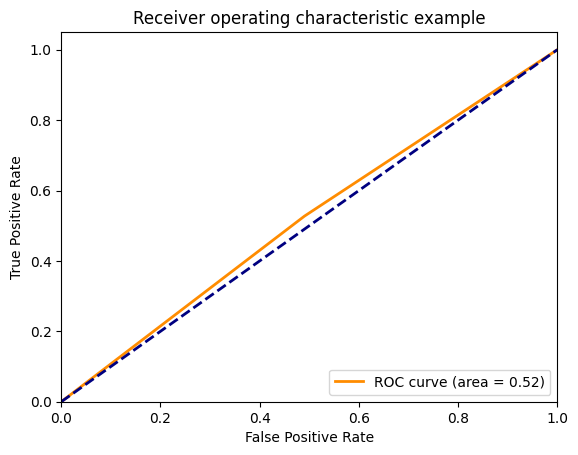

In [42]:
fpr, tpr, threshold = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()